# ST2195 Coursework Part 2.2

## UOL ID: 220460044

In [62]:
# Import libraries into Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV

In [2]:
# Read carriers data
carriers_df = pd.read_csv("carriers.csv")

In [4]:
# Initialize an empty DataFrame to store probabilities
probabilities_df = pd.DataFrame(columns=["Year", "Probability"])

In [5]:
# Initialize an empty dictionary to store coefficients
coefficients_dict = {}

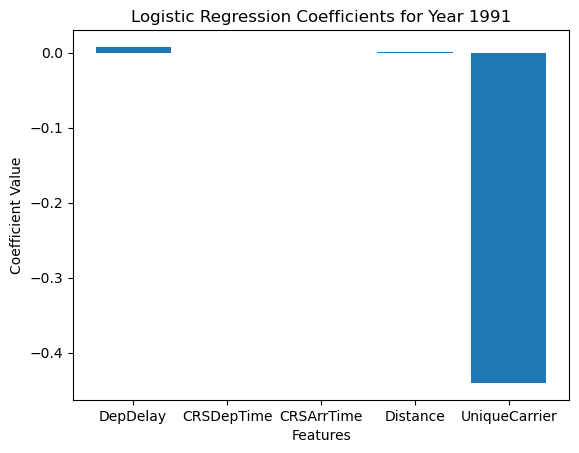

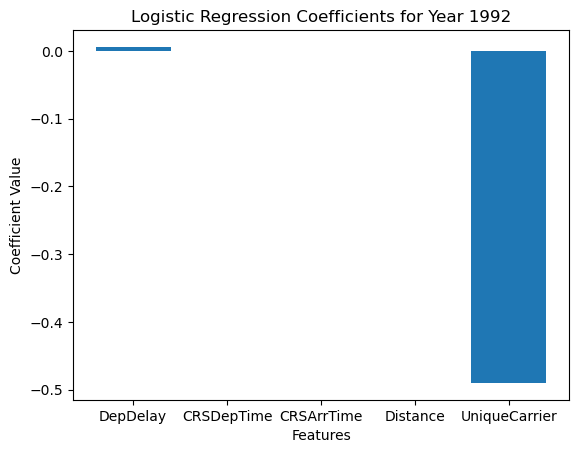

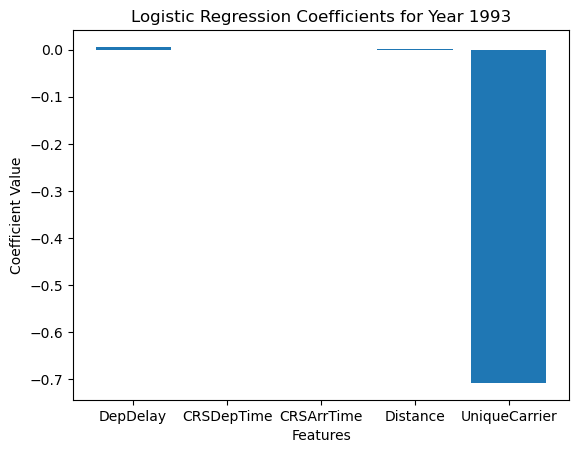

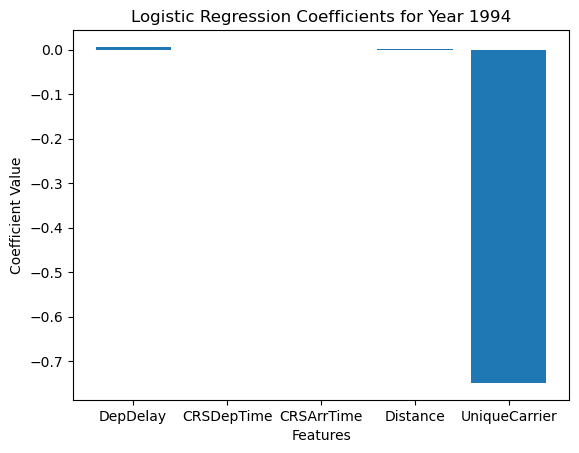

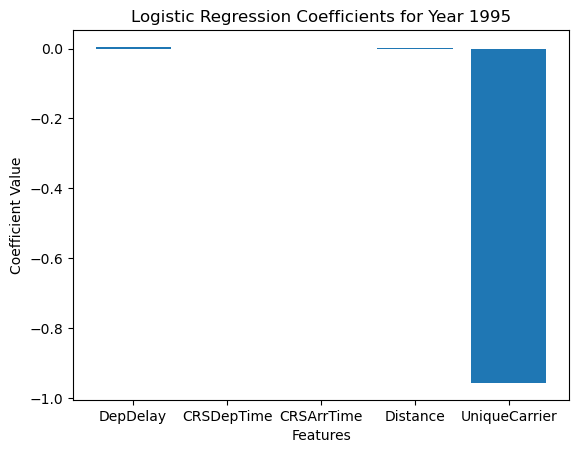

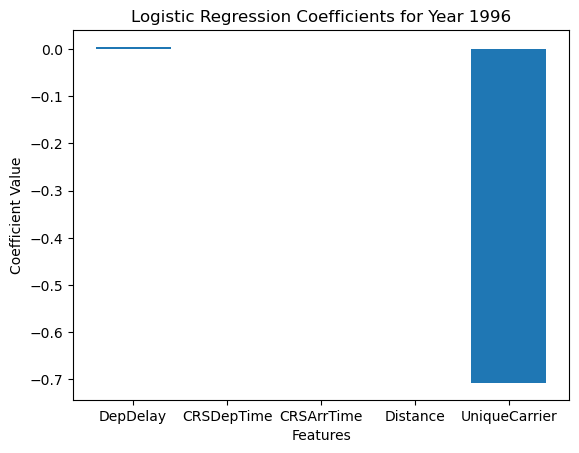

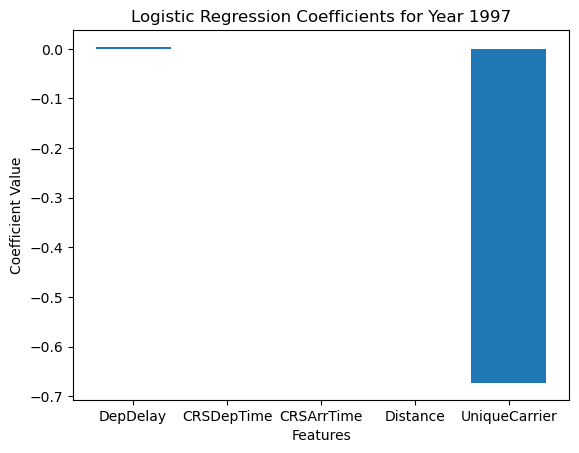

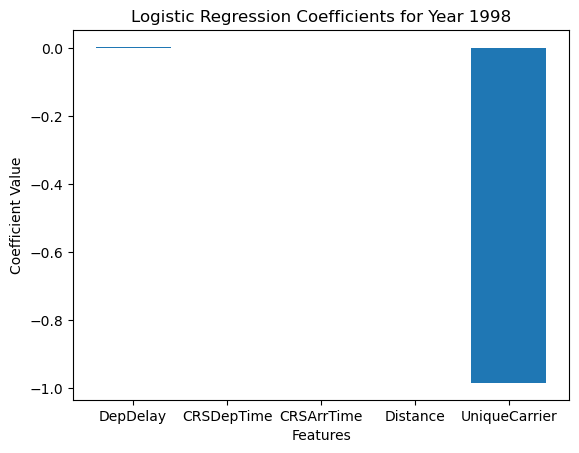

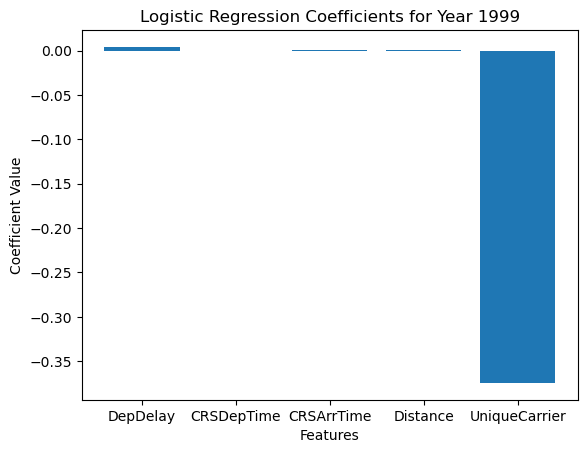

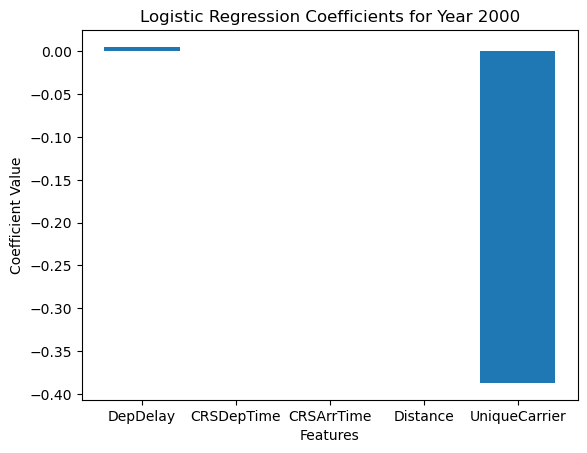

In [67]:
for i in range(1991, 2001):
    # Read flight data for the current year
    ontime_c = pd.read_csv(f"{i}.csv")
    
    # Left join with carriers_df
    ontime_ci = pd.merge(ontime_c, carriers_df, left_on='UniqueCarrier', right_on='Code', how='left')
    
    # Prepare features and target variable
    features = ["DepDelay", "CRSDepTime", "CRSArrTime", "Distance", "UniqueCarrier"]
    target = "Diverted"
    
    # Convert categorical variables to one-hot encoding
    categorical_features = ['UniqueCarrier']
    numerical_features = ["DepDelay", "CRSDepTime", "CRSArrTime", "Distance"]
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', SimpleImputer(strategy='mean'), numerical_features),
            ('cat', OneHotEncoder(), categorical_features)])
    
    # Fit logistic regression model
    model = Pipeline(steps=[('preprocessor', preprocessor),
                         ('classifier', LogisticRegression(max_iter=10000, penalty=None))])

    # Predict probabilities of plane diversion
    X = ontime_ci[features]
    y = ontime_ci[target]
    
    model.fit(X, y)
    probabilities = model.predict_proba(X)[:, 1]
    
    # Aggregate and store probabilities
    year_probability = np.mean(probabilities)
    probabilities_df = pd.concat([probabilities_df, pd.DataFrame({'Year': [i], 'Probability': [year_probability]})], ignore_index=True)
    
    # Optionally, store coefficients
    coefficients_dict[i] = model.named_steps['classifier'].coef_[0]
    
    # Create a barplot for the current year
    plt.figure()
    plt.bar(features, coefficients_dict[i][:len(features)])
    plt.title(f"Logistic Regression Coefficients for Year {i}")
    plt.xlabel("Features")
    plt.ylabel("Coefficient Value")
    plt.show()

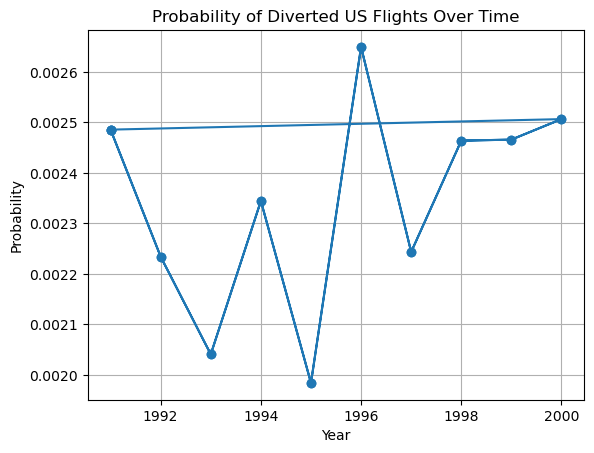

In [68]:
# Plot the line graph for probability of diversion over the years
plt.plot(probabilities_df['Year'], probabilities_df['Probability'], marker='o')
plt.title("Probability of Diverted US Flights Over Time")
plt.xlabel("Year")
plt.ylabel("Probability")
plt.grid(True)
plt.show()